In [2]:
# Loading the data and the target (X and y)
# The sets are ordered, so when splitting them into training and test set, we'll need to split them more randomly.
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data, iris.target

classifier = KNeighborsClassifier()

print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0 0 1 2 0 0 1 1 1
 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1 1 2 2 1 0 1 1 2
 2]
All:  [ 33.33333333  33.33333333  33.33333333]
Training:  [ 30.66666667  40.          29.33333333]
Test:  [ 36.          26.66666667  37.33333333]
All:  [ 33.33333333  33.33333333  33.33333333]
Training:  [ 33.33333333  33.33333333  33.33333333]
Test:  [ 33.33333333  33.33333333  33.33333333]
train_y:  [1 1 1 0 0 2 1 1 1 0 1 0 2 0 0 2 0 2 1 1 0 0 2 1 2 1 0 1 1 1 2 1 2 2 0 0 2
 2 0 0 2 2 2 2 0 2 0 2 1 1 0 2 2 0 2 1 2 1 2 1 1 0 0 1 2 0 0 2 2 1 0 1 0 0
 1]
test_y:  [0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 1 2 0 1 1 1 0 2 2 2 1 0 0 1 1 0 2 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]
pred_y:  [0 2 1 0 2 0 1 2 0 0 2 1 2 0 1 2 2 2 2 2 1 2 1 1 2 2 0 0 1 0 0 2 0 1 0 0 1
 1 2 2 0 1 0 1 2 2 0 1 1 2 0 2 2 2 1 0 0 1 1 0 1 1 0 2 0 2 1 1 2 0 2 1 0 0
 1]
Fraction of correct predictions (accuracy): 0.96
Fraction of c

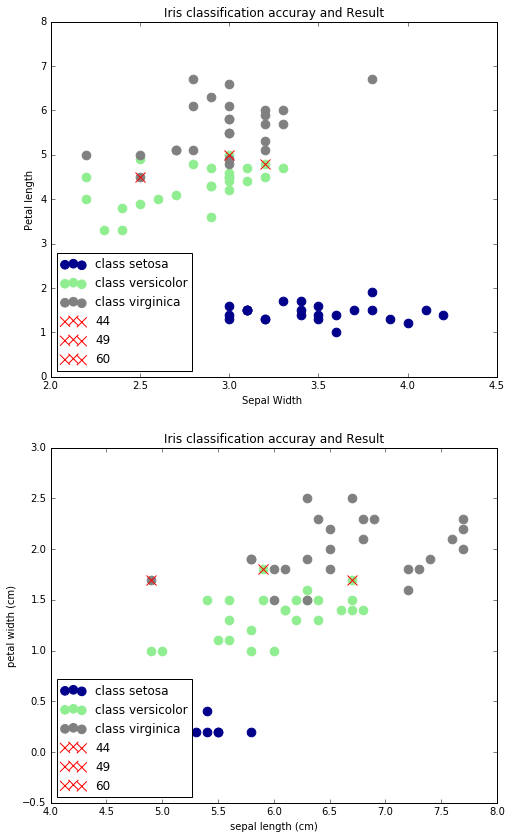

sepal width (cm)


In [48]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.5, random_state = 123)

# train_test_split has randomly shuffled the samples before splitting them into training and testing set
print(train_y) 

# Stratification : when splitting we may lose the proportion of different examples. The idea of stratification is
# to keep this proportions the same.
print('All: ', np.bincount(y) / float(len(y)) * 100)
print('Training: ', np.bincount(train_y) / float(len(train_y)) * 100)
print('Test: ', np.bincount(test_y) / float(len(test_y)) * 100)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.5, random_state = 123, stratify = y)
print('All: ', np.bincount(y) / float(len(y)) * 100)
print('Training: ', np.bincount(train_y) / float(len(train_y)) * 100)
print('Test: ', np.bincount(test_y) / float(len(test_y)) * 100)

print('train_y: ', train_y)

classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print('test_y: ', test_y)
print('pred_y: ', pred_y)

print('Fraction of correct predictions (accuracy):', 1 - np.sum(np.abs(test_y-pred_y))/len(pred_y) )
# A more python way to do it is :
print('Fraction of correct predictions (accuracy):', np.sum(test_y == pred_y)/len(pred_y) )

correct_idx = np.where(test_y == pred_y)[0]
print('Samples correctly classified: ', correct_idx)

incorrect_idx = np.where(test_y != pred_y)[0]
print('Samples incorrecly classified: ', incorrect_idx)

# plot incorrect predictions
%matplotlib inline
from matplotlib import pyplot as plt
colors = ['darkblue', 'lightgreen', 'gray']

fig = plt.figure(figsize=(8,14))
plt.subplot(2,1,1)

idx1, idx2 = 1,2
for n, color in enumerate(colors):
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, idx1], test_X[idx, idx2], color=color, label='class {}'.format(iris.target_names[n]), marker='o', s=75)

for i in incorrect_idx:
    plt.scatter(test_X[i, idx1], test_X[i, idx2], color='red', marker='x', s=100, label='{}'.format(i))

plt.xlabel('Sepal Width ')
plt.ylabel('Petal length')
plt.legend(loc=3)
plt.title("Iris classification accuray and Result")


plt.subplot(2,1,2)

idx1, idx2 = 0,3
for n, color in enumerate(colors):    
    idx = np.where(test_y == n)[0]
    plt.scatter(test_X[idx, idx1], test_X[idx, idx2], color=color, label='class {}'.format(iris.target_names[n]), marker='o', s=75)

for i in incorrect_idx:
    plt.scatter(test_X[i, idx1], test_X[i, idx2], color='red', marker='x', s=100, label='{}'.format(i))

plt.xlabel(iris.feature_names[idx1])
plt.ylabel(iris.feature_names[idx2])
plt.legend(loc=3)
plt.title("Iris classification accuray and Result")
plt.show()

print(iris.feature_names[1])
    

###### 